In [1]:
#import all libraries here

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import calendar
import plotly.express as px
df = pd.read_csv("../attacks.csv", encoding='latin1')

1. Move code into VSC 
2. Keep code on jupyter notebook
3. On VSC you can create the docstrings and comment the code
4. We;ll try imports again

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
#lets check the columns 
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
#check how many values are missing per index.
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [5]:
#check the total number of cases in the data
len(df)

25723

In [6]:
# Check the number of NUL values per column 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
#drop all the data with missing dates, removing the data since we only want to use the data that is complete. 
#df.dropna(subset=['Date'], inplace = True)


In [8]:
#remove all missing values from the df if in complete value is not usable
df = df.dropna(subset=['Fatal (Y/N)'])
df = df.dropna(subset=['Activity'])
df = df.dropna(subset=['Case Number'])
#cleaner.drop_na(df, "Fatal (Y/N)")

In [9]:
#check length
len(df)

5343

In [10]:
#href, href formula, pdf, unnames 22 and unnamed 23 do not seem like usefull date, lets remove them 
df = df.drop(['href', 'href formula', 'pdf'], axis = 1)
#remove unnamed 22 and 23, they do not seem to add any value 
df = df.drop(['Unnamed: 22', 'Unnamed: 23'], axis = 1)

#cleaner.drop(df,'href')
#cleaner.drop(df,'href formula')
#cleaner.drop(df,'pdf')

#cleaner.drop(df,'Unnamed: 22')
#cleaner.drop(df,'Unnamed: 23')


In [11]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND.0006,ND.0006,7.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,ND.0003,4.0


In [13]:
#create a new variable "new-Date" to store the DATE in a new format and then brinf it back to the original df 
new_Date = df["Date"]
new_Date = new_Date.str.replace("-", "/")
new_Date = new_Date.str.replace('--','/')
new_Date = new_Date.str.replace(" ", "/")
new_Date = new_Date.str.replace("Jan", "01")
new_Date = new_Date.str.replace("Feb", "02")
new_Date = new_Date.str.replace("Mar", "03")
new_Date = new_Date.str.replace("Apr", "04")
new_Date = new_Date.str.replace("May", "05")
new_Date = new_Date.str.replace("Jun", "06")
new_Date = new_Date.str.replace("Jul", "07")
new_Date = new_Date.str.replace("Aug", "08")
new_Date = new_Date.str.replace("Sep", "09")
new_Date = new_Date.str.replace("Oct", "10")
new_Date = new_Date.str.replace("Nov", "11")
new_Date = new_Date.str.replace("Dec", "12")
new_Date = new_Date.str.replace("Reported", '')
new_Date = new_Date.str.replace('Early ','')
new_Date = new_Date.str.replace('Late ','')
df["Date"] = new_Date

#check the df after changing the date formatting
df
"""
cleaner.new_Date(df, '-','/')
cleaner.new_Date(df, '--','/')
cleaner.new_Date(df, "Jan", "01")
cleaner.new_Date(df, "Feb", "02")
cleaner.new_Date(df, "Mar", "03")
cleaner.new_Date(df, "Apr", "04")
cleaner.new_Date(df, "May", "05")
cleaner.new_Date(df, "Jun", "06")
cleaner.new_Date(df, "Jul", "07")
cleaner.new_Date(df, "Aug", "08")
cleaner.new_Date(df, "Sep", "09")
cleaner.new_Date(df, "Oct", "10")
cleaner.new_Date(df, "Nov", "11")
cleaner.new_Date(df, "Dec", "12")
cleaner.new_Date(df, "Reported", '')
cleaner.new_Date(df, 'Early ','')
cleaner.new_Date(df, 'Late ','')
"""



'\ncleaner.new_Date(df, \'-\',\'/\')\ncleaner.new_Date(df, \'--\',\'/\')\ncleaner.new_Date(df, "Jan", "01")\ncleaner.new_Date(df, "Feb", "02")\ncleaner.new_Date(df, "Mar", "03")\ncleaner.new_Date(df, "Apr", "04")\ncleaner.new_Date(df, "May", "05")\ncleaner.new_Date(df, "Jun", "06")\ncleaner.new_Date(df, "Jul", "07")\ncleaner.new_Date(df, "Aug", "08")\ncleaner.new_Date(df, "Sep", "09")\ncleaner.new_Date(df, "Oct", "10")\ncleaner.new_Date(df, "Nov", "11")\ncleaner.new_Date(df, "Dec", "12")\ncleaner.new_Date(df, "Reported", \'\')\ncleaner.new_Date(df, \'Early \',\'\')\ncleaner.new_Date(df, \'Late \',\'\')\n'

In [14]:
#continue exploring by checking Fatal (Y/N)
df['Fatal (Y/N)'].value_counts()
#We can see that besides N and Y there are also 'UNKNOWN', ' N', 'M', '2017', 'N', 'y' in the list. lets do something about that.
#Assume that m is a typo since its next to n o n the key board, 2017 will be turned into UNKNOWN since we do not know if it could have been N or Y 

N          4017
Y          1282
UNKNOWN      36
 N            5
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [ ]:
# Need to turn all non Y/N values into Y or N. 
df["Fatal (Y/N)"] = df['Fatal (Y/N)'].apply(lambda x: x.strip())
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace("2017", "UNKNOWN")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace("M", "N")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace("y", "Y")
"""
cleaner.Fatal(df, "2017", "UNKNOWN")
cleaner.Fatal(df, "M", "N")
cleaner.Fatal(df, "y", "Y")
"""

#I want to check if the injury is 'Unknown and remove it'
#check new value list
df['Fatal (Y/N)'].value_counts()




In [15]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2,original order
0,2018.06.25,25/06/2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,2018.06.25,6303.0
1,2018.06.18,18/06/2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,2018.06.18,6302.0
2,2018.06.09,09/06/2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,2018.06.09,6301.0
3,2018.06.08,08/06/2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,2018.06.08,6300.0
4,2018.06.04,04/06/2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before/1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND.0006,ND.0006,7.0
6297,ND.0005,Before/1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND.0005,ND.0005,6.0
6298,ND.0004,Before/1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,ND.0004,5.0
6299,ND.0003,1900/1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,ND.0003,4.0


In [16]:
selected = ['Case Number', 'Year', 'Country', 'Activity', 'Fatal (Y/N)']
df = df.loc[:,selected]
df.columns

Index(['Case Number', 'Year', 'Country', 'Activity', 'Fatal (Y/N)'], dtype='object')

In [18]:
#create a new column to save the values of month, extracted from the case number. 
df['Month'] = df['Case Number'].str.extract('(\.\d{2}\.)')
df['Month'] = df['Month'].str.extract('(\d{2})')
df.Month = df.Month.fillna(0).astype('int')

#check through the total number of months 
for x in range(1,13):
    df.loc[df['Month'] == x, 'Month'] = calendar.month_name[x]
    
# Null values replaced by 0. They account for 6.4% of the total:
df.loc[df['Month'] == 0, 'Month'] = 'Unknown'


In [19]:
df.head()
# not happy with the layout of the df, month should come after year
# also the year has to be a 4 digit number without '.**'

,Case Number,Year,Country,Activity,Fatal (Y/N),Month
0,2018.06.25,2018.0,USA,Paddling,N,June
1,2018.06.18,2018.0,USA,Standing,N,June
2,2018.06.09,2018.0,USA,Surfing,N,June
3,2018.06.08,2018.0,AUSTRALIA,Surfing,N,June
4,2018.06.04,2018.0,MEXICO,Free diving,N,June


In [20]:
#change Dtype to remove the '.0' behind the year
df["Year"] = df["Year"].fillna(0.0).astype(int)
df

,Case Number,Year,Country,Activity,Fatal (Y/N),Month
0,2018.06.25,2018,USA,Paddling,N,June
1,2018.06.18,2018,USA,Standing,N,June
2,2018.06.09,2018,USA,Surfing,N,June
3,2018.06.08,2018,AUSTRALIA,Surfing,N,June
4,2018.06.04,2018,MEXICO,Free diving,N,June
...,...,...,...,...,...,...
6296,ND.0006,0,AUSTRALIA,Swimming,Y,Unknown
6297,ND.0005,0,AUSTRALIA,Diving,Y,Unknown
6298,ND.0004,0,AUSTRALIA,Pearl diving,Y,Unknown
6299,ND.0003,0,USA,Swimming,Y,Unknown


In [21]:
#check that value type has changed from float64 to an int64
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5343 entries, 0 to 6301
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Case Number  5343 non-null   object
 1   Year         5343 non-null   int64 
 2   Country      5305 non-null   object
 3   Activity     5343 non-null   object
 4   Fatal (Y/N)  5343 non-null   object
 5   Month        5343 non-null   object
dtypes: int64(1), object(5)
memory usage: 292.2+ KB


In [22]:
#Check frquency of row value
df['Activity'].value_counts()
#I do not want to  keep activities that occur less than 10 times

Surfing                                                 933
Swimming                                                780
Fishing                                                 411
Spearfishing                                            309
Bathing                                                 149
                                                       ... 
Surf-fishing                                              1
Freediving for abalone (at surface)                       1
Scuba diving for lobsters                                 1
Fishing, trying to catch the end of his fishing line      1
Wreck of  large double sailing canoe                      1
Name: Activity, Length: 1420, dtype: int64

In [23]:
#clean up the selection to 4 categories 
# Swimming, top of watersports, under water sports, shallow water,  
#We will only take activities that occur 10 or more times for the statistics
df.columns = [element.strip('') for element in df.columns]
df = df.groupby('Activity').filter(lambda x : len(x)>9)

In [24]:
#Dictionary, goal is to reduce the number of activities people parttake in. 
activity_dict = {
    'Surfing': ['surf', 'Body surfing', 'Surf skiing', 'Boogie Boarding', 'Boogie boarding', 'Body boarding', 'Surfing'
               ],
    'Swimming': ['Floating', 'Swimming', 'Snorkeling', 'Swimming '
                ],
    'Wading': ['Walking', 'Treading water',  'Standing', 'Wading', 'Bathing'
                ],
    'Underwater sports': ['Sponge diving', 'Scuba Diving', 'Freediving', 'Canoeing', 'Free diving', 'Pearl diving', 'Scuba diving', 'Diving', 'Spearfishing'    
                ],
    'Fishing': ['Fishing for sharks', 'Surf fishing', 'Fishing', 'Shark fishing', 'Fishing', 'Kayak Fishing' 
                ],
    'Water sports': ['Rowing', 'Windsurfing', 'Kayaking' 
                ],
    'Accident': ['Fell overboard' 
                ]
}




In [25]:
#Function to create the dictionary
def acti (activity_dict, x):
        #j key
        #k values
        #for every element of the values
    for j, k in activity_dict.items():
        for i in k:
            #if the element is in the string
            if i in x:
             #return the key
                return j

In [26]:
#new column for the saved values 
df['filtered_activities'] = df['Activity'].apply(lambda x:acti(activity_dict, x))

In [27]:
#Check value counts 
df['filtered_activities'].value_counts()

Surfing              1112
Swimming              921
Underwater sports     566
Fishing               470
Wading                432
Water sports           43
Accident               29
Name: filtered_activities, dtype: int64

In [28]:
#Visualisation 

In [29]:
#show most dangerous activity per month of the year (in what month of the year is the most dangerous activity most lethal)

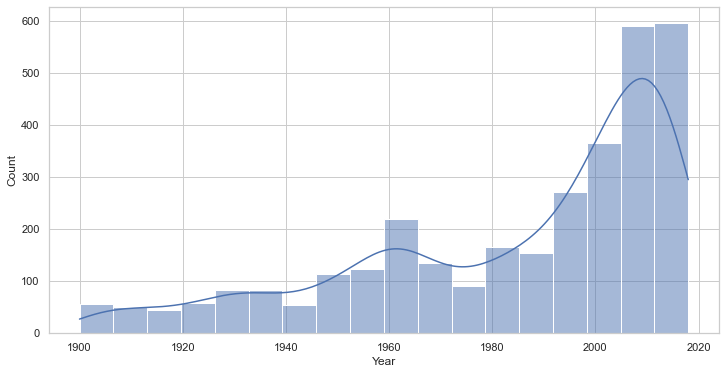

In [30]:
#First we will be checking how the number of attacks has evolved during the last 70 years. 
sns.histplot(x=df[df.Year >= 1900].Year, bins=18, kde=True);


<AxesSubplot:xlabel='Year', ylabel='Count'>

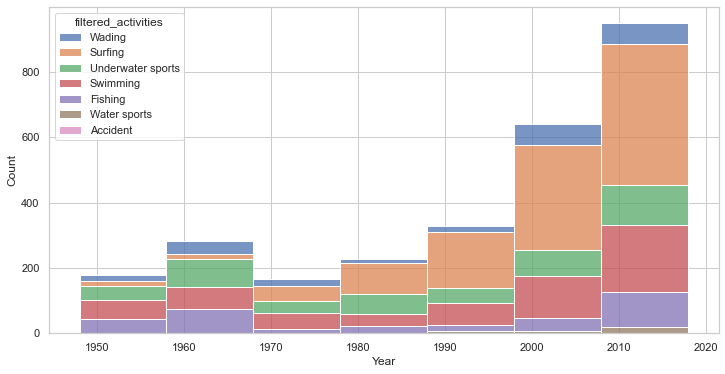

In [31]:
#Now lets have a look at a smaller number of years and incluse the  activity that people were participating in.
sns.histplot(data=df, x=df[df.Year >= 1948].Year, hue="filtered_activities", bins=7, multiple="stack")
#The plot is split up in 7 bins to show the progression per decade

<AxesSubplot:xlabel='Year', ylabel='Count'>

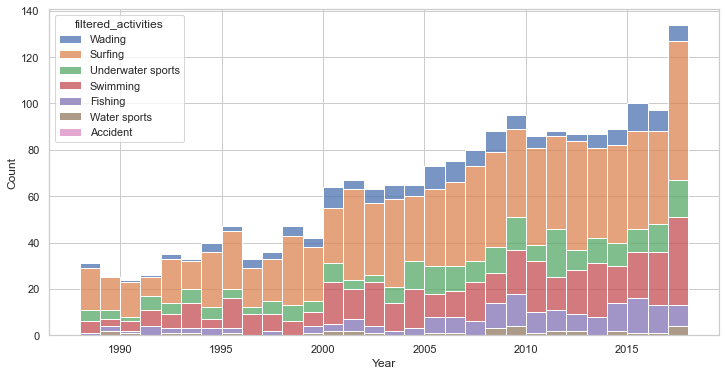

In [32]:
# Since the number of attacks has seen the biggest increase in recent years we will have a look at the last 30 years of development
sns.histplot(data=df, x=df[df.Year >= 1988].Year, hue="filtered_activities", bins=30, multiple="stack")



<AxesSubplot:xlabel='Year', ylabel='count'>

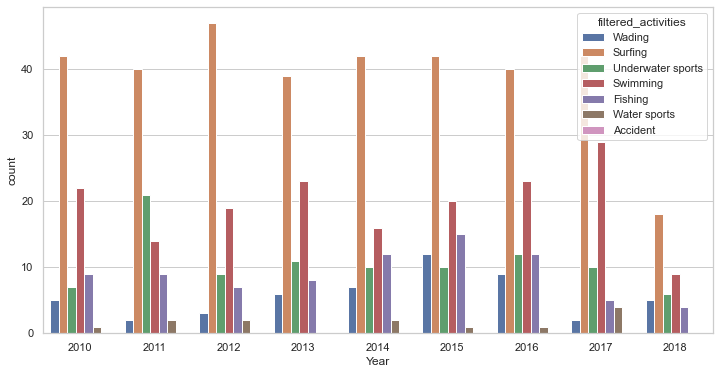

In [33]:
#An overview is given of the differencr in number of attacks depending on the activity that the person was participating in. 
# Surfing is by far the most common casue for sharks to attack.
# the momement of the sharks probably makes the shark interested as they ususally attack animals that live close to the surface. 
sns.countplot(x=df[df.Year >= 2010].Year, hue=df["filtered_activities"])

<AxesSubplot:xlabel='Month', ylabel='Count'>

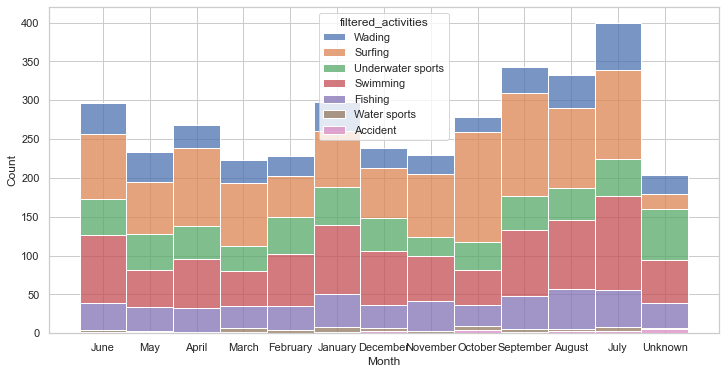

In [34]:
#Now lets have a look at what time of the year is most dangerous for people to be in the water. 
sns.histplot(data=df, x=df.Month, hue="filtered_activities", bins=12, multiple="stack")
# The majority of attacks take place during summer. As more people find themselves in the water at this time of year. 

<AxesSubplot:xlabel='filtered_activities', ylabel='Count'>

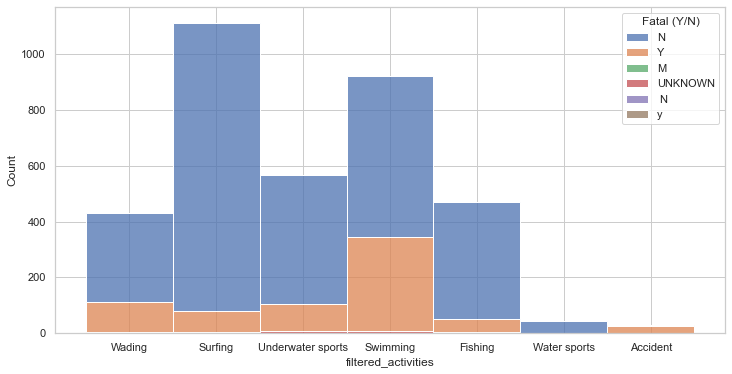

In [35]:
#Besides knowing when sharks are most prone to attack it is also important to know what activities lead to the most fatality. 
sns.histplot(data=df, x="filtered_activities", hue="Fatal (Y/N)", multiple="stack")
#The number of Lethal shark attacks on surfers is suprisingly low and is probably caused by the fact that they have a flotation device with them and surfers can get to shallow water with reefs quickly. 
#people that are swimming and people doing underwater sports such as diving and spearfishing have close to no protection and would be bitten directly whereas the surfboard would get hit first in many cases

<AxesSubplot:xlabel='filtered_activities', ylabel='Count'>

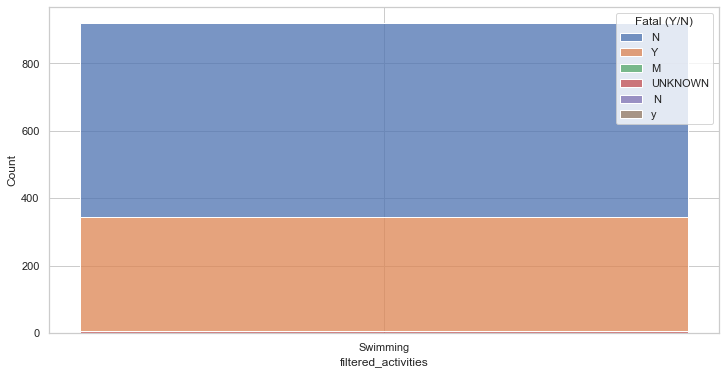

In [36]:

sns.histplot(data=df, x=df[df.filtered_activities == 'Swimming'].filtered_activities, hue="Fatal (Y/N)", multiple="stack")


<AxesSubplot:xlabel='Month,Fatal (Y/N)'>

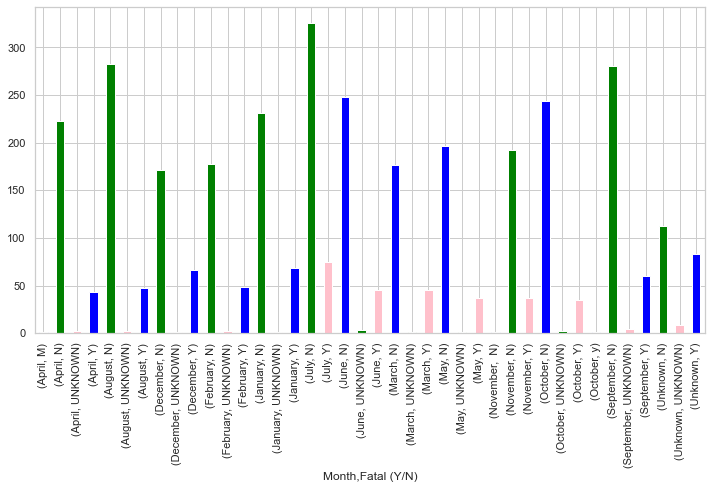

In [37]:
df.groupby(["Month", "Fatal (Y/N)"])["Fatal (Y/N)"].count().plot(kind="bar", color=["blue","green","pink"])
#Observations - graph is not shown chronologically 


In [38]:
# Most and least Fatal
# July is the month with the most people that are in a non Lethal attack  

# June is the month with most Fatal cases 

# October and Septemebr are the month with the highest number of unknown cases for Fatal and non Fatal